In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_data(ticker: str, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Downloads historical adjusted close price data for a given ticker.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    # Ensure we have adjusted close
    if 'Adj Close' not in data.columns:
        data['Adj Close'] = data['Close']
    df = data[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
    return df


def compute_sma(data: pd.DataFrame, window: int) -> pd.Series:
    """
    Computes a simple moving average (SMA) of the adjusted close price.

    Args:
        data (pd.DataFrame): DataFrame with an 'adj_close' column.
        window (int): Lookback period for the SMA.

    Returns:
        pd.Series: The SMA values.
    """
    return data['adj_close'].rolling(window=window).mean()


/var/folders/r6/qxn1kdgx0s3__p30fzwgj_840000gn/T/ipykernel_86145/1314942544.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


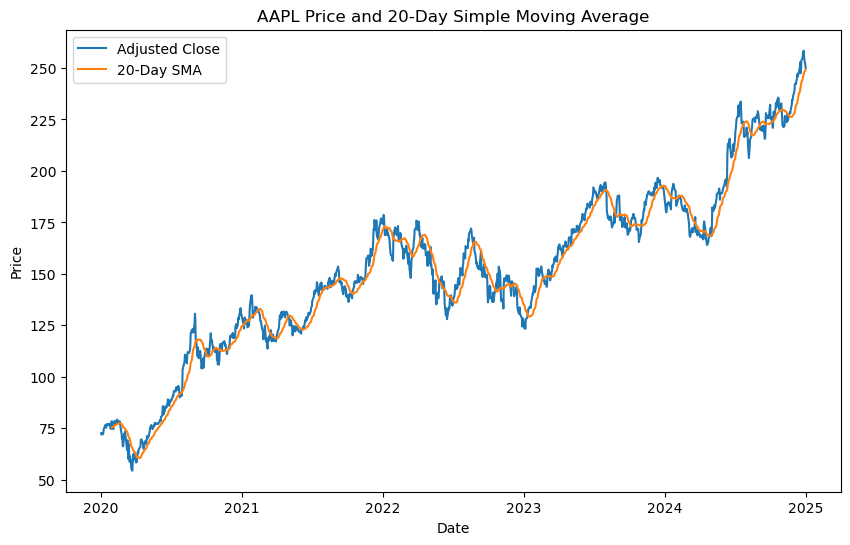

In [5]:

# Parameters
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-01-01'
sma_window = 20

data = get_data(ticker, start_date, end_date)

# Compute SMA
data['sma'] = compute_sma(data, sma_window)

# Plot price and SMA
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['adj_close'], label='Adjusted Close')
plt.plot(data.index, data['sma'], label=f'{sma_window}-Day SMA')
plt.title(f"{ticker} Price and {sma_window}-Day Simple Moving Average")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
